In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print(iris.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
X_uni = iris[['sepal_length']]
y_uni = iris['sepal_width']

In [ ]:
X_uni_train, X_uni_test, y_uni_train, y_uni_test = train_test_split(X_uni, y_uni,
test_size=0.2, random_state=42)

In [ ]:
uni_model = LinearRegression()

In [ ]:
uni_model.fit(X_uni_train,y_uni_train)

LinearRegression()

In [ ]:
y_uni_pred = uni_model.predict(X_uni_test)

In [ ]:
print(f'Univariate MSE: {mean_squared_error(y_uni_test, y_uni_pred)}')
print(f'Univariate R-squared: {r2_score(y_uni_test, y_uni_pred)}')

Univariate MSE: 0.13961895650579023
Univariate R-squared: 0.024098626473972984


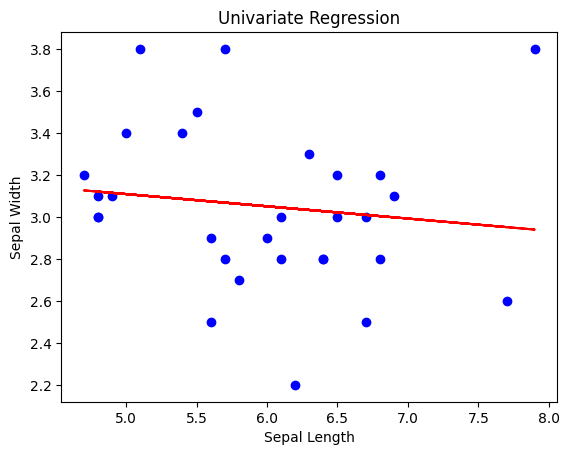

In [ ]:
plt.scatter(X_uni_test, y_uni_test, color='blue')
plt.plot(X_uni_test, y_uni_pred, color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Univariate Regression')
plt.show()

plt.scatter(X_uni_test, y_uni_test, color='blue')
plt.plot(X_uni_test, y_uni_pred, color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Univariate Regression')
plt.show()

In [ ]:
X_bi = iris[['sepal_length', 'petal_length']]
y_bi = iris['sepal_width']

In [ ]:
X_bi_train, X_bi_test, y_bi_train, y_bi_test = train_test_split(X_bi, y_bi,
test_size=0.2, random_state=42)

In [ ]:
bi_model = LinearRegression()
bi_model.fit(X_bi_train, y_bi_train)

LinearRegression()

In [ ]:
y_bi_pred = bi_model.predict(X_bi_test)

In [ ]:
print(f'Bivariate MSE: {mean_squared_error(y_bi_test, y_bi_pred)}')
print(f'Bivariate R-squared: {r2_score(y_bi_test, y_bi_pred)}')

Bivariate MSE: 0.08308605032913309
Bivariate R-squared: 0.4192494152204116


Text(0, 0.5, 'Sepal Width')

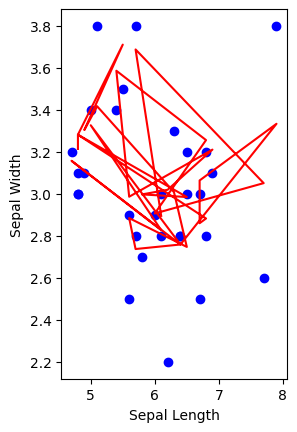

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X_bi_test['sepal_length'], y_bi_test, color='blue')
plt.plot(X_bi_test['sepal_length'], y_bi_pred, color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Sepal Width')

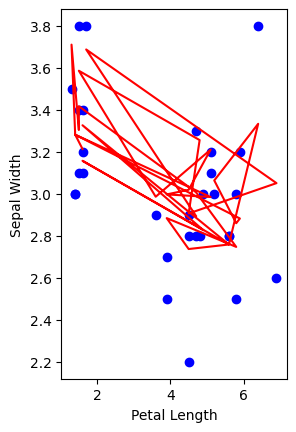

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(X_bi_test['petal_length'], y_bi_test, color='blue')
plt.plot(X_bi_test['petal_length'], y_bi_pred, color='red')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')

In [ ]:
plt.suptitle('Bivariate Regression')
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
X_multi = iris[['sepal_length', 'petal_length', 'petal_width']]
y_multi = iris['sepal_width']

In [ ]:
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi,
y_multi, test_size=0.2, random_state=42)

In [ ]:
multi_model = LinearRegression()
multi_model.fit(X_multi_train, y_multi_train)

LinearRegression()

In [ ]:
y_multi_pred = multi_model.predict(X_multi_test)

In [ ]:
print(f'Multivariate MSE: {mean_squared_error(y_multi_test, y_multi_pred)}')
print(f'Multivariate R-squared: {r2_score(y_multi_test, y_multi_pred)}')

Multivariate MSE: 0.0868353771078583
Multivariate R-squared: 0.39304256448374897


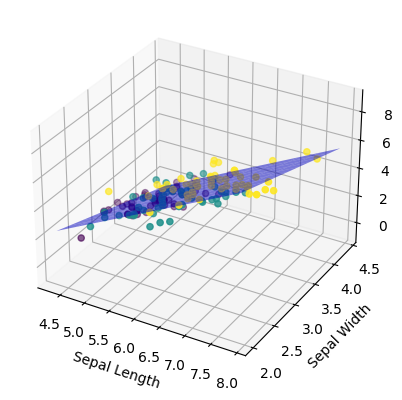

In [ ]:


iris = load_iris()
X = iris.data[:, :3]
y = iris.target

model = LinearRegression()
model.fit(X[:, :2], X[:, 2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')

x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1, x2 = np.meshgrid(x1_range, x2_range)
x3 = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

  ax.plot_surface(x1, x2, x3, color='blue', alpha=0.5)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.show()

In [ ]:
print('Univariate Coefficients:', uni_model.coef_)
print('Bivariate Coefficients:', bi_model.coef_)
print('Multivariate Coefficients:', multi_model.coef_)

Univariate Coefficients: [-0.05829418]
Bivariate Coefficients: [ 0.56420418 -0.33942806]
Multivariate Coefficients: [ 0.62934965 -0.63196673  0.6440201 ]
